In [1]:
#1. Business Problem:
#2. Objectives: 

In [2]:
#3. Loading the necessary libraries:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # encoding process
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # knn algorithm 
from sklearn.svm import SVC #support vector machine
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [3]:
os.getcwd()

'C:\\Users\\harma\\ML projects'

# Data Loading

In [4]:
data = pd.read_csv('cancer_data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data.shape

(569, 33)

In [6]:
data.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# EDA:

In [9]:
data.drop_duplicates(inplace=True) # if any duplicate rows are coming then that row/s will be deleted

In [10]:
data.shape

(569, 33)

In [11]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
data['diagnosis'].value_counts()  #class balance

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
print ('B cancer class:', round(data['diagnosis'].value_counts()['B']/len(data)*100, 2), '%')
print ('M cancer class:', round(data['diagnosis'].value_counts()['M']/len(data)*100, 2), '%')

B cancer class: 62.74 %
M cancer class: 37.26 %


In [14]:
sns.countplot(data['diagnosis'])

ValueError: could not convert string to float: 'M'

# Missing values:

In [19]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#del(data['Unnamed: 32']) # One way to do it

In [20]:
data.drop('Unnamed: 32', axis=1, inplace=True) # Another way to do it

In [21]:
data.shape

(569, 32)

In [22]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Encoding Process:

In [ ]:
#One way to do it , manually through map function

In [24]:
#data['diagnosis'] = data['diagnosis'].map({'petrol':0, 'M':1}).astype(int)

In [ ]:
#data.head()

In [ ]:
#Algorithm based - Label encoder:
# Diagnosis column is a target column , so, i can choose label encoder 

In [23]:
from sklearn.preprocessing import LabelEncoder # 1.step
encoder_obj = LabelEncoder() #2.step
data['diagnosis'] = encoder_obj.fit_transform(data['diagnosis']) # 3.step
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
data.drop('id', axis=1, inplace=True)

In [26]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [29]:
for i in cols:
    print ('*******', i, '*************')
    print ('std.deviation:', data[i].std())
    print ('skewness:', data[i].skew())
    print ('kurtosis:', data[i].kurtosis())
    

******* radius_mean *************
std.deviation: 3.524048826212078
skewness: 0.9423795716730992
kurtosis: 0.8455216229065377
******* texture_mean *************
std.deviation: 4.301035768166949
skewness: 0.6504495420828159
kurtosis: 0.7583189723727752
******* perimeter_mean *************
std.deviation: 24.2989810387549
skewness: 0.9906504253930081
kurtosis: 0.9722135477110654
******* area_mean *************
std.deviation: 351.9141291816527
skewness: 1.6457321756240424
kurtosis: 3.6523027623507582
******* smoothness_mean *************
std.deviation: 0.014064128137673616
skewness: 0.45632376481955844
kurtosis: 0.8559749303632245
******* compactness_mean *************
std.deviation: 0.0528127579325122
skewness: 1.1901230311980404
kurtosis: 1.650130467219256
******* concavity_mean *************
std.deviation: 0.0797198087078935
skewness: 1.4011797389486722
kurtosis: 1.9986375291042124
******* concave points_mean *************
std.deviation: 0.03880284485915359
skewness: 1.1711800812336282
k

In [30]:
outliers_list = []
normal_list =[]
for i in cols:
    print ('*******', i, '*************')
    print ('std.deviation:', data[i].std())
    print ('skewness:', data[i].skew())
    print ('kurtosis:', data[i].kurtosis())
    if (data[i].kurtosis()>3 or data[i].kurtosis()<-3):
        outliers_list.append(i)
    else:
        normal_list.append(i)
print (outliers_list, normal_list)

******* radius_mean *************
std.deviation: 3.524048826212078
skewness: 0.9423795716730992
kurtosis: 0.8455216229065377
******* texture_mean *************
std.deviation: 4.301035768166949
skewness: 0.6504495420828159
kurtosis: 0.7583189723727752
******* perimeter_mean *************
std.deviation: 24.2989810387549
skewness: 0.9906504253930081
kurtosis: 0.9722135477110654
******* area_mean *************
std.deviation: 351.9141291816527
skewness: 1.6457321756240424
kurtosis: 3.6523027623507582
******* smoothness_mean *************
std.deviation: 0.014064128137673616
skewness: 0.45632376481955844
kurtosis: 0.8559749303632245
******* compactness_mean *************
std.deviation: 0.0528127579325122
skewness: 1.1901230311980404
kurtosis: 1.650130467219256
******* concavity_mean *************
std.deviation: 0.0797198087078935
skewness: 1.4011797389486722
kurtosis: 1.9986375291042124
******* concave points_mean *************
std.deviation: 0.03880284485915359
skewness: 1.1711800812336282
k

In [31]:
print (outliers_list)
print ('************************')
print (normal_list)

['area_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']
************************
['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']


******** area_mean ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


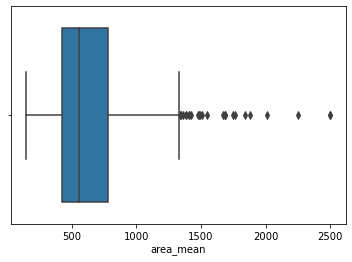

******** fractal_dimension_mean ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


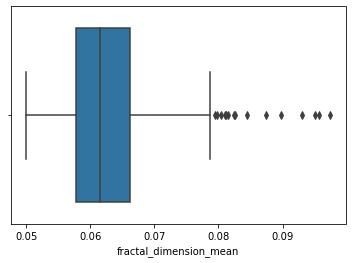

******** radius_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


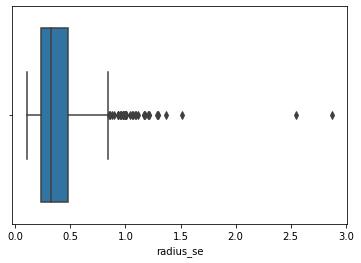

******** texture_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


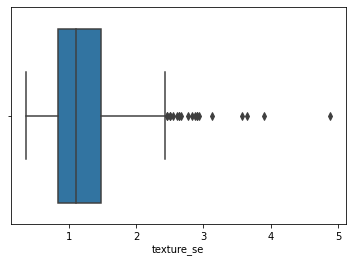

******** perimeter_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


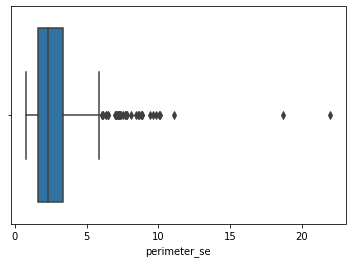

******** area_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


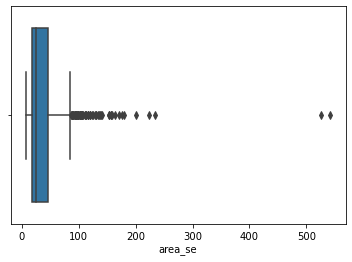

******** smoothness_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


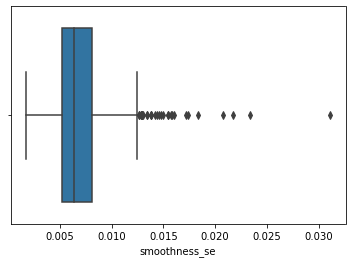

******** compactness_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


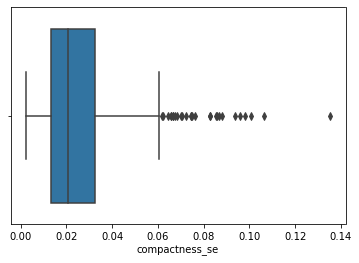

C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


******** concavity_se ********


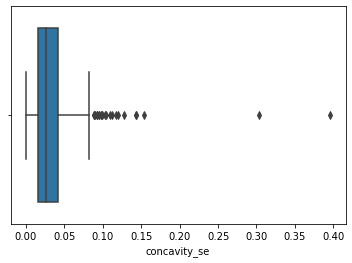

C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


******** concave points_se ********


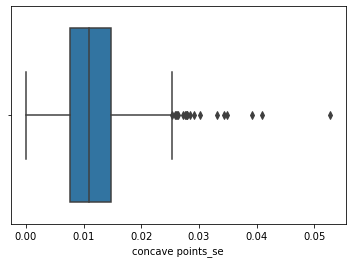

******** symmetry_se ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


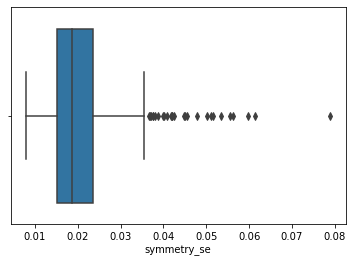

C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


******** fractal_dimension_se ********


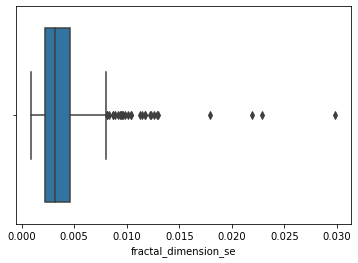

******** area_worst ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


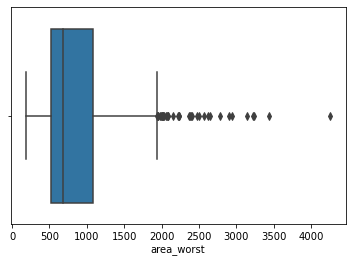

******** compactness_worst ********


C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


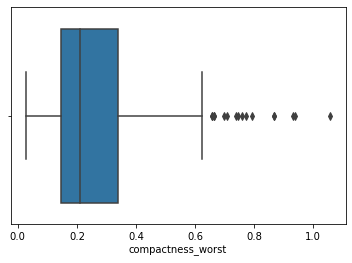

C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


******** symmetry_worst ********


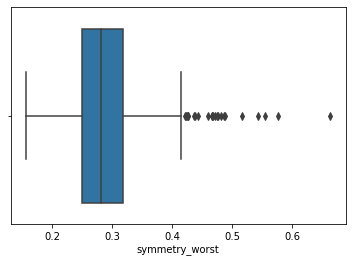

C:\Users\Siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


******** fractal_dimension_worst ********


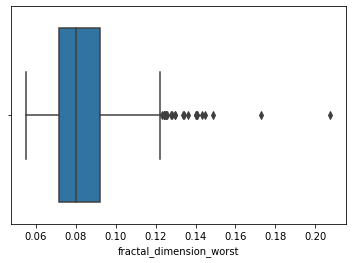

In [32]:
for i in outliers_list:
    print ('********', i,'********')
    sns.boxplot(data[i])
    plt.show()

In [33]:
# IQR Method

In [34]:
def outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    ol=[]
    for i in df:
        if i<lower or i>upper:
            ol.append(i)
    print ('lower wisker value', lower,'\n', 'Upper wisker value', upper)
    if len(ol)>0:
        print ('Outliers are ', ol)
    else:
        print ('There are no outliers in your data')
    return

In [35]:
for i in outliers_list:
    print ('*******', i, '*************')
    print (outlier(data[i]))

******* area_mean *************
lower wisker value -123.30000000000001 
 Upper wisker value 1326.3000000000002
Outliers are  [1404.0, 1878.0, 1509.0, 1761.0, 1686.0, 2250.0, 1685.0, 2499.0, 1670.0, 1364.0, 1419.0, 1491.0, 1747.0, 2010.0, 1546.0, 1482.0, 1386.0, 1335.0, 1407.0, 1384.0, 2501.0, 1682.0, 1841.0, 1347.0, 1479.0]
None
******* fractal_dimension_mean *************
lower wisker value 0.045070000000000006 
 Upper wisker value 0.07874999999999999
Outliers are  [0.09744, 0.08243, 0.08046, 0.0898, 0.08142, 0.08261, 0.09296, 0.08116, 0.08104, 0.08743, 0.0845, 0.0795, 0.09502, 0.09575, 0.07976]
None
******* radius_se *************
lower wisker value -0.13735000000000003 
 Upper wisker value 0.84865
Outliers are  [1.095, 0.9555, 1.046, 0.8529, 1.214, 0.9811, 0.9806, 0.9317, 0.8973, 1.215, 1.509, 1.296, 1.0, 1.088, 0.8601, 2.873, 0.9553, 1.058, 1.004, 1.292, 1.172, 1.167, 0.8811, 1.111, 1.072, 1.009, 0.9948, 0.9761, 1.207, 1.008, 1.37, 0.9291, 2.547, 0.9289, 1.291, 0.9915, 0.9622, 1.17

In [ ]:
#Manipulating outliers / Imputation of outliers: Mask function

In [36]:
data['area_mean'] = data['area_mean'].mask(data['area_mean']>1326.3, data['area_mean'].mean())
data['area_mean'] = data['area_mean'].mask(data['area_mean']<-123.4, data['area_mean'].mean())

# Feature Engineering / Selection : Correlation Analysis:


In [37]:
corr = data.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.715693,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.841500,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.314891,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.836378,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.715693,0.841500,0.314891,0.836378,1.000000,0.110505,0.420924,0.537110,0.669643,0.137672,...,0.819051,0.300003,0.808534,0.743762,0.103954,0.376840,0.467406,0.649366,0.200360,0.023289
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.110505,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.420924,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.537110,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.669643,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.137672,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

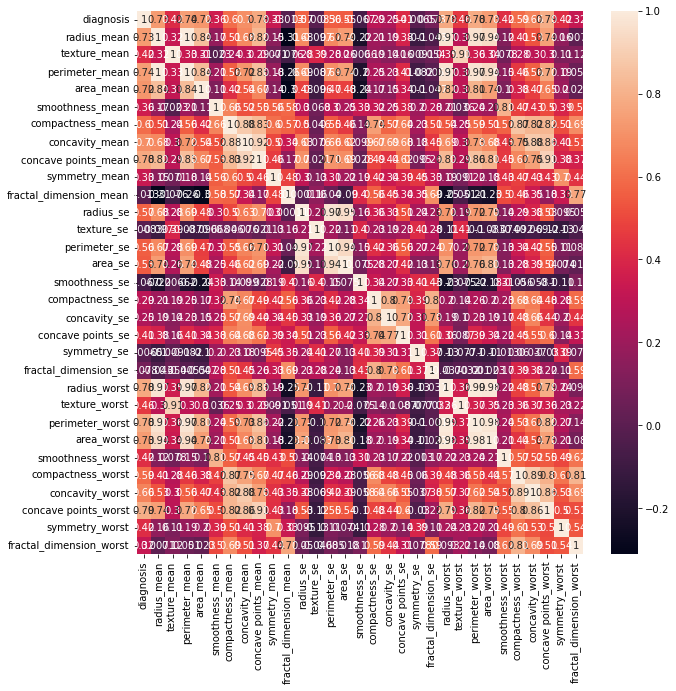

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [39]:
corr = data.corr()['diagnosis'].sort_values(ascending=False)
corr

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.715693
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [40]:
sel=data.corr()['diagnosis']>0.57
sel

diagnosis                   True
radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

In [41]:
print('Selected features', sel[sel== True])
print ('\n\n')
x = data[list(sel.index[sel])]
x.drop('diagnosis', inplace=True, axis=1)
print(x)


Selected features diagnosis               True
radius_mean             True
perimeter_mean          True
area_mean               True
compactness_mean        True
concavity_mean          True
concave points_mean     True
radius_worst            True
perimeter_worst         True
area_worst              True
compactness_worst       True
concavity_worst         True
concave points_worst    True
Name: diagnosis, dtype: bool



     radius_mean  perimeter_mean    area_mean  compactness_mean  \
0          17.99          122.80  1001.000000           0.27760   
1          20.57          132.90  1326.000000           0.07864   
2          19.69          130.00  1203.000000           0.15990   
3          11.42           77.58   386.100000           0.28390   
4          20.29          135.10  1297.000000           0.13280   
..           ...             ...          ...               ...   
564        21.56          142.00   654.889104           0.11590   
565        20.13          131.20  126

C:\Users\Siri\AppData\Local\Temp\ipykernel_1580\1744621299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('diagnosis', inplace=True, axis=1)


In [43]:
y = data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [ ]:
x

# Data splitting - 

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,train_size=0.8, random_state=45)
x_train

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
50,11.76,74.72,427.9,0.04966,0.01657,0.011150,12.98,82.98,516.5,0.08615,0.05523,0.03715
313,11.54,73.73,409.1,0.05969,0.01367,0.008907,12.34,81.23,467.8,0.16260,0.08324,0.04715
305,11.60,74.23,417.2,0.05688,0.01974,0.013130,12.44,81.39,476.5,0.13610,0.07239,0.04815
18,19.81,130.00,1260.0,0.10270,0.14790,0.094980,27.32,186.80,2398.0,0.31500,0.53720,0.23880
8,13.00,87.50,519.8,0.19320,0.18590,0.093530,15.49,106.20,739.3,0.54010,0.53900,0.20600
...,...,...,...,...,...,...,...,...,...,...,...,...
15,14.54,96.73,658.8,0.15950,0.16390,0.073640,17.46,124.10,943.2,0.65770,0.70260,0.17120
377,13.46,85.89,562.1,0.04726,0.01271,0.011170,14.69,97.11,680.6,0.14570,0.07934,0.05781
163,12.34,79.85,464.5,0.10150,0.05370,0.028220,13.58,87.36,553.0,0.23380,0.16880,0.08194
544,13.87,89.77,584.8,0.10180,0.03688,0.023690,15.05,99.17,688.6,0.20370,0.13770,0.06845


In [46]:
y_train.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

# K-NN Algorithm 

In [48]:
from sklearn.neighbors import KNeighborsClassifier # 1.step
cls_model = KNeighborsClassifier(n_neighbors=1, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy:', accuracy_score(y_test, pred))

model accueracy: 0.9035087719298246


In [49]:
cls_model = KNeighborsClassifier(n_neighbors=2, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=2:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=3:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=4, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=4:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=5:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=7, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=7:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=9, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=9:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=15, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=15:', accuracy_score(y_test, pred))
print ('****************************************')
cls_model = KNeighborsClassifier(n_neighbors=17, metric= 'minkowski') #Object creation 
cls_model.fit(x_train,y_train) #3.step -training
pred = cls_model.predict(x_test) #4.step - testing 
print ('model accueracy for K=17:', accuracy_score(y_test, pred))

model accueracy for K=2: 0.8859649122807017
****************************************
model accueracy for K=3: 0.9210526315789473
****************************************
model accueracy for K=4: 0.9035087719298246
****************************************
model accueracy for K=5: 0.9210526315789473
****************************************
model accueracy for K=7: 0.9298245614035088
****************************************
model accueracy for K=9: 0.9298245614035088
****************************************
model accueracy for K=15: 0.9385964912280702
****************************************
model accueracy for K=17: 0.9298245614035088


In [50]:
#Final Model 
final_model = KNeighborsClassifier(n_neighbors=15, metric='minkowski')
final_model.fit(x_train, y_train)
predictions = final_model.predict(x_test)
print ('Accuracy of final model:', round(accuracy_score(y_test, predictions),2)*100, '%')

Accuracy of final model: 94.0 %


In [51]:
df1 = pd.DataFrame({'real': y_test, 'predicted':predictions})
df1.head(40)

,real,predicted
440,0,0
262,1,1
260,1,1
145,0,0
504,0,0
342,0,0
452,0,0
327,0,0
524,0,0
384,0,0


# Support Vector Machine Algorithm (SVM)

In [59]:
from sklearn.svm import SVC #step1
svc_model = SVC(kernel='rbf') #step2 
svc_model.fit(x_train, y_train) #step3 - train algo
svc_pred = svc_model.predict(x_test)
print ('Accuracy of final model:', round(accuracy_score(y_test, svc_pred),2)*100, '%')

Accuracy of final model: 93.0 %


# Performance Metric:

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[71,  1],
       [ 6, 36]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

93.85964912280701

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score
print ('precision score:', precision_score(y_test, predictions)*100)
print ('recall score:', recall_score(y_test, predictions)*100)

print ('F1-score:', f1_score(y_test, predictions)*100)

precision score: 97.2972972972973
recall score: 85.71428571428571
F1-score: 91.13924050632912


In [56]:
x_train.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [58]:
#Real Time Applications
radius_mean = float(input('Enter the radius_mean:'))
perimeter_mean = float(input('Enter the perimeter_mean:'))
area_mean = float(input('Enter the area_mean:'))
compactness_mean = float(input('Enter compactness_mean'))
concavity_mean = float(input('Enter the concavity_mean:'))
concave_points_mean = float(input('Enter the concave points_mean:'))
radius_worst = float(input('Enter the radius_worst:'))

perimeter_worst = float(input('Enter the perimeter_worst:'))
area_worst = float(input('Enter the area_worst:'))
compactness_worst = float(input( 'compactness_worst:'))
concavity_worst = float(input('Enter the concavity_worst:'))
concave_points_worst = float(input('Enter the concave points_worst:'))


prediction_results= final_model.predict([[radius_mean, perimeter_mean, area_mean,compactness_mean,
                                          concavity_mean,concave_points_mean, radius_worst, perimeter_worst,
                                          area_worst,compactness_worst, concavity_worst, concave_points_worst]])

if prediction_results==1:
    print ('Patient diagnosed as Malignent cancer')
else:
    print ('Patient diagnosed as Byning cancer')
    


Enter the radius_mean:14.27
Enter the perimeter_mean:93.77
Enter the area_mean:629.8
Enter compactness_mean0.1154
Enter the concavity_mean:0.1463
Enter the concave points_mean:0.06139
Enter the radius_worst:15.29
Enter the perimeter_worst:104.3
Enter the area_worst:728.3
compactness_worst:0.2733
Enter the concavity_worst:0.4234
Enter the concave points_worst:0.1362
Patient diagnosed as Byning cancer


C:\Users\Siri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [57]:
x_train[5:6]

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
536,14.27,93.77,629.8,0.1154,0.1463,0.06139,15.29,104.3,728.3,0.2733,0.4234,0.1362
